# Here we give sigmas and infer tns and kappa, and shape.

The goal is to get the cruve to close by choosing sigma correctly.

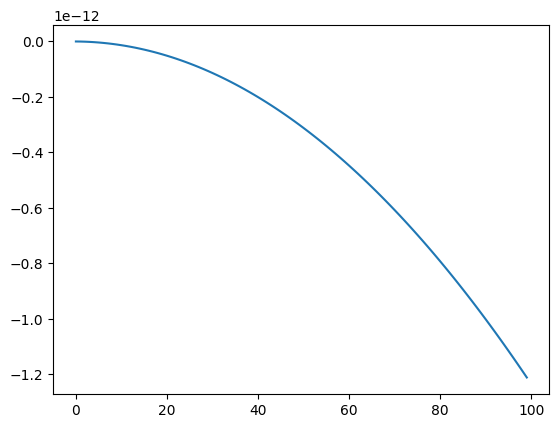

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def populate_sigmas():
    return np.ones(N) / 2 / np.pi

#assuming arclength param with total N
def dot(array):
    out = np.zeros_like(array)
    for i in range(len(array)-1):
        out[i] = array[i+1] - array[i]
    out[len(array)-1] = array[0] - array[-1]
    return out

def get_next_point(curve, i, kappa):
    if i == 0:
        tgt = np.array([1, 0])
    else:
        tgt = curve[i] - curve[i-1]
    theta = np.linalg.norm(tgt) * kappa

    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    rtgt = np.dot(rotation_matrix, tgt)
    return curve[i] + rtgt

N = 100
tns = np.zeros(N)
tndots = dot(tns)
sigmas = populate_sigmas()
sigmadots = dot(sigmas)
kappas = np.zeros(N)
kappas[0] = 2 * np.pi

p = 1
fss = np.zeros(N)
fns = p * np.ones(N)

tns[0] = 0

curve = np.zeros((N, 2))

for i in range(N-1):
    kappas[i] = (fns[i] + tndots[i]) / sigmas[i]
    curve[i+1] = get_next_point(curve, i, kappas[i])
    # tns[i+1] = tns[i] + np.linalg.norm(curve[i+1] - curve[i]) * (1 / tns[i]) * (sigmas[i] * fss[i] + tns[i] * fns[i] - sigmas[i] * sigmadots[i])

plt.plot(curve[:,0], curve[:,1])

In [4]:
tns

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [5]:
np.linalg.norm(curve[0] - curve[-1])

np.float64(99.0)

In [6]:
np.linalg.norm(np.array([1, 0]))

np.float64(1.0)

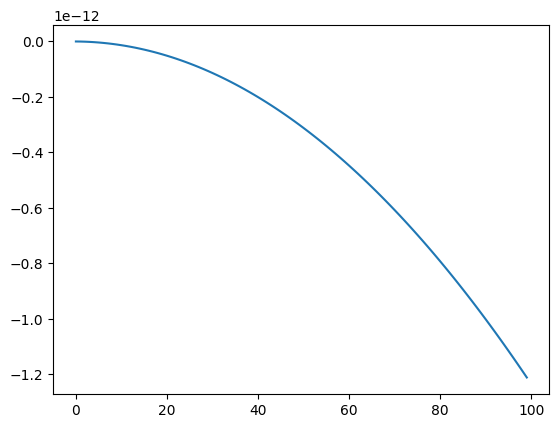

In [7]:
import matplotlib.pyplot as plt

plt.plot(curve[:,0], curve[:,1])

## Composite method Nov 27

1) Given ts, solve equation 10 in the pdf subject to int_ds tn = 0
2) Get the curvature from one of the other eqns
3) Integrate the tangent angle
4) Integrate x and y with cum trapz

For now we set tangential forces 0

### Constant pressure and nontrivial normal tensions

difference in angle mod 2pi: -5.786213215581205
difference in sigma: -14.866257417360925
difference in tns: -0.46399509675174144
tndot-p at the end: -35.26111976573026


/var/folders/tw/wwds8prs35n99xx6b_5911sh0000gn/T/ipykernel_84295/164536873.py:44: RuntimeWarning: invalid value encountered in sqrt
  sigmas = np.sqrt(y)


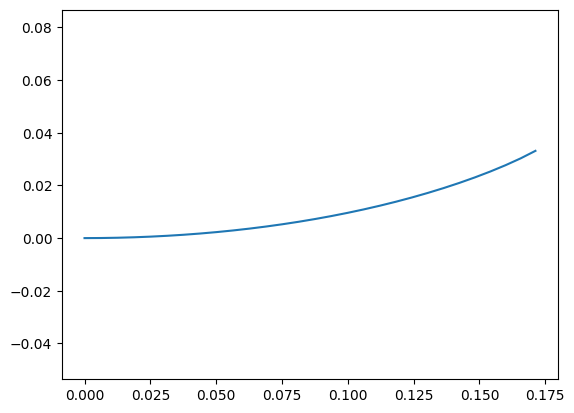

In [37]:
import numpy as np
import desolver as de
import desolver.backend as D
from scipy import integrate as sint
import matplotlib.pyplot as plt

N = 1000

p = 30
fss = np.zeros(N)
fns = p * np.ones(N)

# 0.9065
R = 1
L = (R * 2 * np.pi)
s = np.linspace(0, L, N)

a1 = p 
a2 = 0.0

tns = np.zeros(N) + a1 * np.cos(s * (2*np.pi)/L) + a2 * np.sin(2 * s * (2*np.pi)/L)
tnssqdot = tns ** 2
tndots = (N / L) * np.gradient(tns)

def get_index(t, N):
    return int(t / (L / N)-1)

def rhs(t, state, ps, tndots):
    sigmasq = state
    t = get_index(t, N)
    dssq = -2 * tns[t] * (tndots[t] + ps[t])
    return D.array(dssq)

initial_state = D.array(p * L / 2*np.pi + 0.5)

params = {'ps': fns, 'tndots': tndots}

a = de.OdeSystem(rhs, y0=initial_state, dense_output=False, t=(0, L), dt=L /(N), constants=params)
a.method = 'Euler'
a.integrate()
y = a.y [:N]
t = a.t [:N]

sigmas = np.sqrt(y)
kappas = (fns + tndots) / sigmas
psis = sint.cumulative_trapezoid(kappas, t, initial=0)

curve = np.zeros((N, 2))
curve[:, 0] = sint.cumulative_trapezoid(np.cos(psis), t, initial=0)
curve[:, 1] = sint.cumulative_trapezoid(np.sin(psis), t, initial=0)

plt.plot(curve[:,0], curve[:,1])
plt.axis('equal')

if np.any(np.isnan(psis)):
    last_index = int(np.where(np.isnan(psis))[0][0])-1
else:
    last_index = N-2

print(f'difference in angle mod 2pi: {psis[last_index] - psis[0] - 2 * np.pi}')
print(f'difference in sigma: {sigmas[last_index] - sigmas[0]}')
print(f'difference in tns: {tns[last_index] - tns[0]}')
print(f'tndot-p at the end: {tndots[last_index] - p}')

In [20]:
np.any(np.nan, psis)

TypeError: only integer scalar arrays can be converted to a scalar index

43

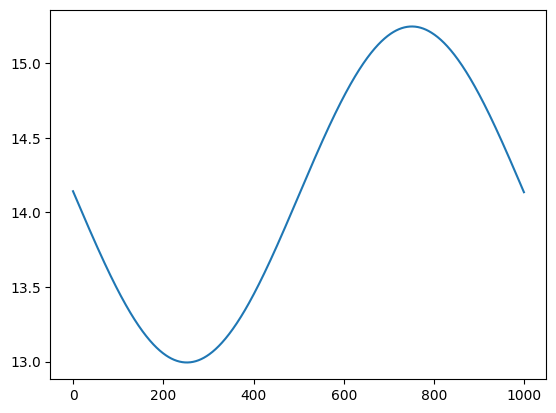

In [32]:
plt.plot(sigmas)

### Constant pressure and arbitrary normal tensions ?? (Approximated by fourier series)

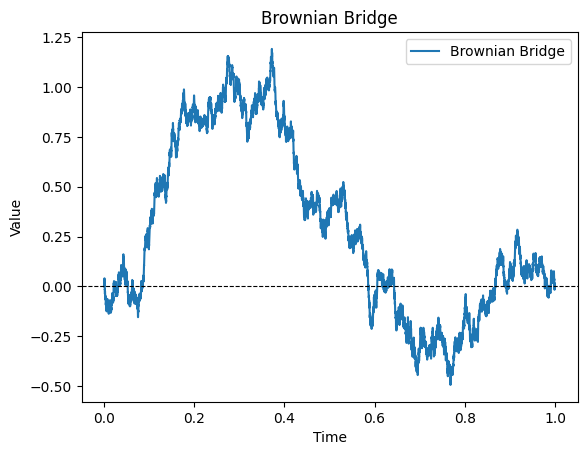

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 10000  # Number of steps
T = 1.0  # Total time (endpoint)
dt = T / N  # Time step size

# Generate standard Brownian motion
np.random.seed(42)  # For reproducibility
dW = np.random.normal(loc=0.0, scale=np.sqrt(dt), size=N)  # Random increments
# W = np.concatenate(([0], np.cumsum(dW)))
W = np.cumsum(dW)  # Brownian motion (starts at 0)

# Create the Brownian bridge
t = np.linspace(0, T, N)  # Time points
B = W - t * (W[-1]-W[0]) - np.ones_like(W) * W[0]  # Adjust to make it a bridge

# Plot the Brownian Bridge
plt.plot(t, B, label="Brownian Bridge")
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Brownian Bridge")
plt.legend()
plt.show()


### Zero integral gaussian bridge

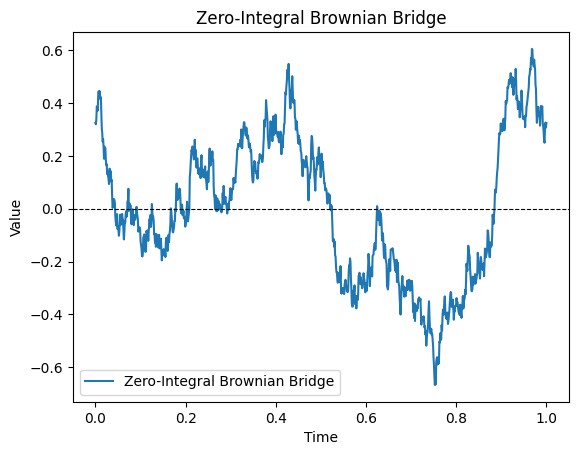

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1000  # Number of points
T = 1.0  # Total time
dt = T / N  # Time step size

# Generate a standard Brownian bridge
np.random.seed(42)  # For reproducibility
dW = np.random.normal(loc=0.0, scale=np.sqrt(dt), size=N)  # Random increments
W = np.cumsum(dW)  # Standard Brownian motion
t = np.linspace(0, T, N)  # Time points
B = W - t * (W[-1]-W[0]) - W[0]  # Brownian bridge

# Enforce zero-integral constraint
integral = np.sum(B[:-1]) * dt  # Discrete integral of B
Z = B - integral  # Subtract the average value to enforce zero integral

# Plot the zero-integral Brownian bridge
plt.plot(t, Z, label="Zero-Integral Brownian Bridge")
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Zero-Integral Brownian Bridge")
plt.legend()
plt.show()


### doing FT of BB

In [12]:
B.shape

(1000,)

/Users/sarce/Desktop/repos/master proj cell shp mechanics/masters/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/sarce/Desktop/repos/master proj cell shp mechanics/masters/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


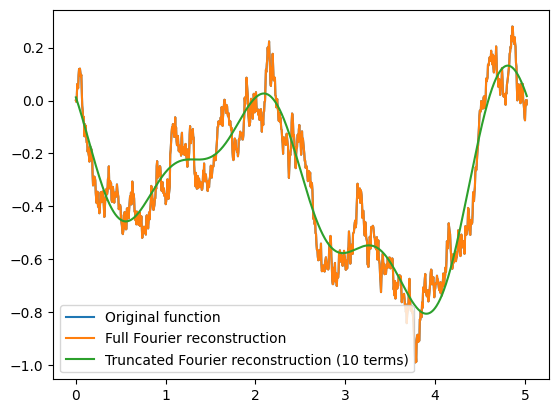

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example data: function values
N = 1000  # Number of points
x = np.linspace(0, L, N, endpoint=False)  # Equally spaced points
f = np.sin(0.5* x) #+ 0.5 * np.cos(5 * x)  # Example function
f = B

# Compute the Fourier coefficients using FFT
coefficients = np.fft.fft(f)  # Fourier coefficients (only those that integrate to 0)
frequencies = np.fft.fftfreq(N, d=(x[1] - x[0]))  # Frequencies

# Reconstruct the function using the Fourier series
reconstructed = np.fft.ifft(coefficients)#.real  # Use inverse FFT for full reconstruction

# Optional: Limit to specific frequencies (e.g., first 10 harmonics)
truncated_coeffs = np.copy(coefficients)
truncated_coeffs[5:-5] = 0  # Zero out higher harmonics
truncated = np.fft.ifft(truncated_coeffs).real  # Use inverse FFT for truncated reconstruction

# Compare original and reconstructed functions
plt.plot(x, f, label="Original function")
plt.plot(x, reconstructed, label="Full Fourier reconstruction")
plt.plot(x, truncated, label="Truncated Fourier reconstruction (10 terms)")
plt.legend()
plt.show()


In [14]:
f.shape

(1000,)

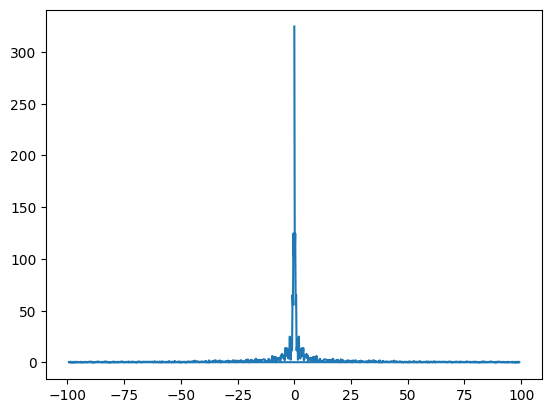

In [15]:
plt.plot(frequencies, np.abs(coefficients), label="Fourier coefficients")

In [16]:
sint.cumulative_trapezoid(reconstructed, x, initial=0)[-1]

np.complex128(-1.6315038528257502+3.5871871557622415e-19j)

In [17]:
frequencies * L

array([   0.,    1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,
          9.,   10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,
         18.,   19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,
         27.,   28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,
         36.,   37.,   38.,   39.,   40.,   41.,   42.,   43.,   44.,
         45.,   46.,   47.,   48.,   49.,   50.,   51.,   52.,   53.,
         54.,   55.,   56.,   57.,   58.,   59.,   60.,   61.,   62.,
         63.,   64.,   65.,   66.,   67.,   68.,   69.,   70.,   71.,
         72.,   73.,   74.,   75.,   76.,   77.,   78.,   79.,   80.,
         81.,   82.,   83.,   84.,   85.,   86.,   87.,   88.,   89.,
         90.,   91.,   92.,   93.,   94.,   95.,   96.,   97.,   98.,
         99.,  100.,  101.,  102.,  103.,  104.,  105.,  106.,  107.,
        108.,  109.,  110.,  111.,  112.,  113.,  114.,  115.,  116.,
        117.,  118.,  119.,  120.,  121.,  122.,  123.,  124.,  125.,
        126.,  127.,

### Ok this is not great, we need something periodic and that integrates to 0. We can try using only even frequencies

True


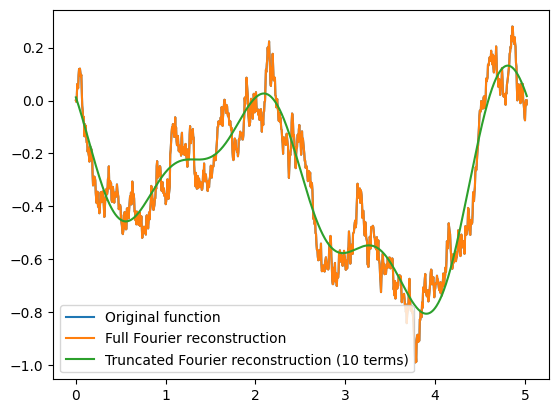

In [18]:
# Compute the Fourier coefficients using FFT
coefficients = np.fft.fft(f) 
frequencies = np.fft.fftfreq(N, d=(x[1] - x[0]))  # Frequencies

# Reconstruct the function using the Fourier series

reconstructed = np.fft.ifft(coefficients).real  # Use inverse FFT for full reconstruction
# reconstructed = reconstructed - reconstructed[0] * np.ones_like(reconstructed)

# Optional: Limit to specific frequencies (e.g., first 10 harmonics)
truncated_coeffs = np.copy(coefficients)
truncated_coeffs[5:-5] = 0  # Zero out higher harmonics

truncated = np.fft.ifft(truncated_coeffs).real  # Use inverse FFT for truncated reconstruction
# truncated = truncated - truncated[0] * np.ones_like(truncated)

print(f.shape==x.shape)
# Compare original and reconstructed functions
plt.plot(x, f, label="Original function")
plt.plot(x, reconstructed, label="Full Fourier reconstruction")
plt.plot(x, truncated, label="Truncated Fourier reconstruction (10 terms)")
plt.legend()
plt.show()


In [19]:
frequencies * L

array([   0.,    1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,
          9.,   10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,
         18.,   19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,
         27.,   28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,
         36.,   37.,   38.,   39.,   40.,   41.,   42.,   43.,   44.,
         45.,   46.,   47.,   48.,   49.,   50.,   51.,   52.,   53.,
         54.,   55.,   56.,   57.,   58.,   59.,   60.,   61.,   62.,
         63.,   64.,   65.,   66.,   67.,   68.,   69.,   70.,   71.,
         72.,   73.,   74.,   75.,   76.,   77.,   78.,   79.,   80.,
         81.,   82.,   83.,   84.,   85.,   86.,   87.,   88.,   89.,
         90.,   91.,   92.,   93.,   94.,   95.,   96.,   97.,   98.,
         99.,  100.,  101.,  102.,  103.,  104.,  105.,  106.,  107.,
        108.,  109.,  110.,  111.,  112.,  113.,  114.,  115.,  116.,
        117.,  118.,  119.,  120.,  121.,  122.,  123.,  124.,  125.,
        126.,  127.,

In [20]:
[(sint.cumulative_trapezoid(np.sin(2*np.pi*frequency * x), x, initial=0)[-1], sint.cumulative_trapezoid(np.cos(2 * np.pi * frequency * x), x, initial=0)[-1]) for frequency in frequencies]

[(np.float64(0.0), np.float64(5.021521697497925)),
 (np.float64(1.5791263139246122e-05), np.float64(-0.005026498635864883)),
 (np.float64(3.158190286577564e-05), np.float64(-0.005026349808184171)),
 (np.float64(4.737129579279956e-05), np.float64(-0.00502610176858042)),
 (np.float64(6.315881858261243e-05), np.float64(-0.005025754526842099)),
 (np.float64(7.894384797067772e-05), np.float64(-0.005025308096680251)),
 (np.float64(9.472576079089002e-05), np.float64(-0.005024762495717973)),
 (np.float64(0.00011050393399962137), np.float64(-0.005024117745494528)),
 (np.float64(0.00012627774470266818), np.float64(-0.005023373871465938)),
 (np.float64(0.0001420465701764242), np.float64(-0.0050225309029964475)),
 (np.float64(0.00015780978789490304), np.float64(-0.005021588873365567)),
 (np.float64(0.00017356677555269942), np.float64(-0.00502054781976253)),
 (np.float64(0.00018931691109209438), np.float64(-0.005019407783288491)),
 (np.float64(0.0002050595727235841), np.float64(-0.00501816880894823

In [21]:
np.sum(coefficients)

np.complex128(5.684341886080802e-14-4.263256414560601e-14j)

Ok not great either I think by a sum of errors this gives nonzero integral which is bad. Let's just do sum of all coefficients for zero integral Bridge

### FT of ZIBB

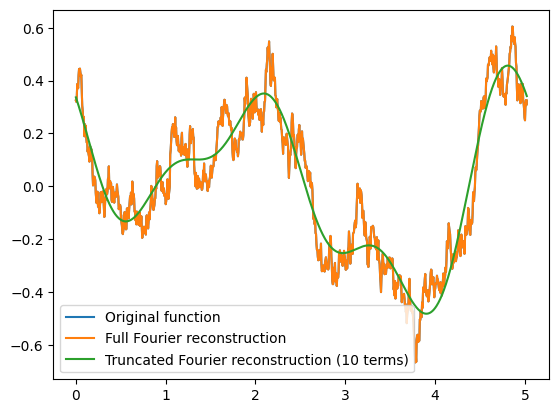

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example data: function values
N = 1000  # Number of points
x = np.linspace(0, L, N, endpoint=False)  # Equally spaced points
f = Z

# Compute the Fourier coefficients using FFT
coefficients = np.fft.fft(f)  # Fourier coefficients (only those that integrate to 0)
frequencies = np.fft.fftfreq(N, d=(x[1] - x[0]))  # Frequencies

# Reconstruct the function using the Fourier series
reconstructed = np.fft.ifft(coefficients)#.real  # Use inverse FFT for full reconstruction

# Optional: Limit to specific frequencies (e.g., first 10 harmonics)
truncated_coeffs = np.copy(coefficients)
truncated_coeffs[5:-5] = 0  # Zero out higher harmonics
truncated = np.fft.ifft(truncated_coeffs).real  # Use inverse FFT for truncated reconstruction

# Compare original and reconstructed functions
plt.plot(x, f, label="Original function")
plt.plot(x, reconstructed, label="Full Fourier reconstruction")
plt.plot(x, truncated, label="Truncated Fourier reconstruction (10 terms)")
plt.legend()
plt.show()


In [23]:
sint.cumulative_trapezoid(truncated, x, initial=0)[-1]

np.float64(-0.001703799853017668)

### Using ZIBB form for tn

difference in angle mod 2pi: 1.8489018694218515
difference in sigma: 0.0017326038825522527
difference in tns: 0.005011695256061988


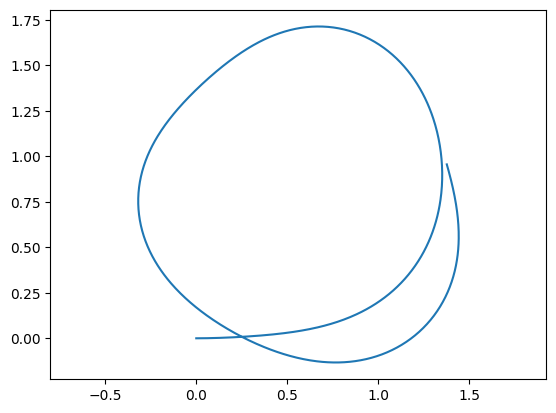

In [ ]:
import numpy as np
import desolver as de
import desolver.backend as D
from scipy import integrate as sint
import matplotlib.pyplot as plt

N = 1000

R = 1.2
L = (R * 2 * np.pi)
s = np.linspace(0, L, N)

a1 = 0.0
a2 = 0.2

tns = truncated
tnssqdot = tns ** 2
tndots = (N / L) * np.gradient(tns)

p = 1
fss = np.zeros(N)
fns = p * np.ones(N)

def get_index(t, N):
    return int(t / (L / N)-1)

def rhs(t, state, ps, tndots):
    sigmasq = state
    t = get_index(t, N)
    dssq = -2 * tns[t] * (tndots[t] + ps[t])
    return D.array(dssq)

initial_state = D.array(1)

params = {'ps': fns, 'tns':tns, 'tndots': tndots}

a = de.OdeSystem(rhs, y0=initial_state, dense_output=False, t=(0, L), dt=L /(N), constants=params)
a.method = 'Euler'
a.integrate()
y = a.y [:N]
t = a.t [:N]

sigmas = np.sqrt(y)
kappas = (fns + tndots) / sigmas
psis = sint.cumulative_trapezoid(kappas, t, initial=0)

curve = np.zeros((N, 2))
curve[:, 0] = sint.cumulative_trapezoid(np.cos(psis), t, initial=0)
curve[:, 1] = sint.cumulative_trapezoid(np.sin(psis), t, initial=0)

plt.plot(curve[:,0], curve[:,1])
plt.axis('equal')

print(f'difference in angle mod 2pi: {psis[-1] - psis[0] - 2 * np.pi}')
print(f'difference in sigma: {sigmas[-1] - sigmas[0]}')
print(f'difference in tns: {tns[-1] - tns[0]}')

Yay! Potato!

### Trying out nonconstant pressure?

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import desolver as de
import desolver.backend as D
from scipy.optimize import fsolve


def gen_tn(N):
    T = 1.0  # Total time
    dt = T / N  # Time step size

    # Generate a standard Brownian bridge
    dW = np.random.normal(loc=0.0, scale=np.sqrt(dt), size=N)  # Random increments
    W = np.cumsum(dW)  # Standard Brownian motion
    t = np.linspace(0, T, N)  # Time points
    B = W - t * (W[-1]-W[0]) - W[0]  # Brownian bridge

    # Enforce zero-integral constraint
    integral = np.sum(B[:-1]) * dt  # Discrete integral of B
    Z = B - integral  # Subtract the average value to enforce zero integral
    f = Z

    # Compute the Fourier coefficients using FFT
    coefficients = np.fft.fft(f)  # Fourier coefficients (only those that integrate to 0)
    truncated_coeffs = np.copy(coefficients)
    truncated_coeffs[5:-5] = 0  # Zero out higher harmonics
    truncated = np.fft.ifft(truncated_coeffs).real  # Use inverse FFT for truncated reconstruction

    return truncated

def get_index(t, N, L):
    return int(t / (L / N)-1)

def rhs(t, state, ps, tns, tndots, N, L):
    sigmasq = state
    t = get_index(t, N)
    dssq = -2 * tns[t] * (tndots[t] + ps[t])
    return D.array(dssq)

def gen_curve(N, tns, fns, L):
    initial_state = D.array(1)
    tndots = (N / L) * np.gradient(tns)
    params = {'N': N, 'L': L, 'ps': fns, 'tns':tns, 'tndots': tndots}

    a = de.OdeSystem(rhs, y0=initial_state, dense_output=False, t=(0, L), dt=L /(N), constants=params)
    a.method = 'Euler'
    a.integrate()
    y = a.y [:N]
    t = a.t [:N]

    sigmas = np.sqrt(y)
    kappas = (fns + tndots) / sigmas
    psis = sint.cumulative_trapezoid(kappas, t, initial=0)

    curve = np.zeros((N, 2))
    curve[:, 0] = sint.cumulative_trapezoid(np.cos(psis), t, initial=0)
    curve[:, 1] = sint.cumulative_trapezoid(np.sin(psis), t, initial=0)

    return curve, psis[-1]-psis[0]

def f(L, tns, fns):
    N = tns.shape[0]
    _, delta_psi = gen_curve(N, tns, fns, L)
    return delta_psi - 2 * np.pi

def find_curve(N):
    p = 1
    tns = gen_tn(N)
    fns = p * np.ones(N)

    def g(L):
        return f(L, tns, fns)
    L = fsolve(g, 1)[0]
    return gen_curve(N, tns, fns, L), L

In [14]:
np.random.seed(42)  # For reproducibility

curve, delta_psi, L = find_curve(1000)

plt.plot(curve[:,0], curve[:,1])
plt.axis('equal')

print(f'difference in angle mod 2pi: {delta_psi}')
print(f'L: {L}')

FailedIntegration: Failed to integrate system

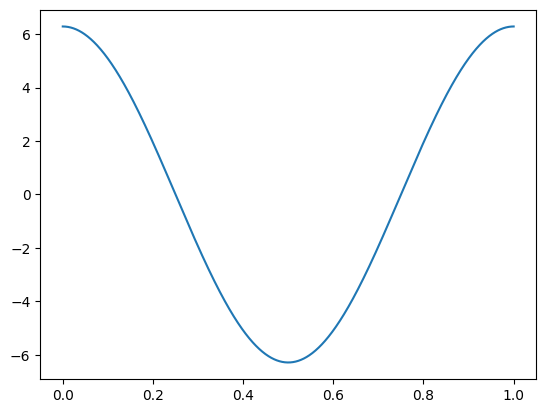

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 1000)
y = np.sin(2 * np.pi * x)
z = np.gradient(y, x)
plt.plot(x, z)